In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('wine-clustering.csv')

In [11]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data[data.columns] = std_scaler.fit_transform(data)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val= train_test_split(data, test_size=0.1, random_state=24)

In [14]:
from sklearn.cluster import KMeans

inertia = []
silhouette = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               random_state=17)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

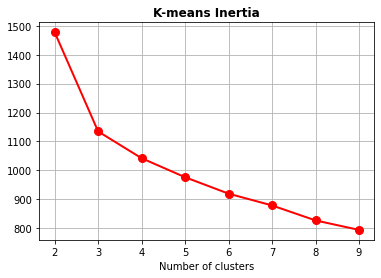

In [15]:
plt.plot(range(2, len(inertia) + 2), inertia, marker='o', lw=2, ms=8, color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia', fontweight='bold')
plt.grid(True)

plt.show()

In [16]:
kmeans = cluster.KMeans(n_clusters=3, random_state=17, init='k-means++')
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [17]:
pred_label = kmeans.predict(X_val)
pred_label

array([2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2], dtype=int32)